In [ ]:
%matplotlib inline  
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df1 = pd.read_csv("/Users/mohsenbahremani/Desktop/Master/COVID compitition/covid_data/fake_covid_news.csv")
df2 = pd.read_csv("/Users/mohsenbahremani/Desktop/Master/COVID compitition/covid_data/real_covid_news.csv")
df1["label"]=0
df2["label"]=1

In [ ]:
df2


,type,title,newstitle,publish_date,content,label
0,article,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",NaN,experts warn most states that are reopening st...,1
1,article,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",NaN,a new study finds an increase in screen time d...,1
2,article,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",NaN,scientists around the world are working on a n...,1
3,article,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",NaN,coronaviruses cause respiratory illnesses so t...,1
4,article,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",NaN,medical experts are studying if remdesivir can...,1
...,...,...,...,...,...,...
3048,NaN,NaN,NaN,NaN,How can we protect people seeking tuberculosis...,1
3049,NaN,NaN,NaN,NaN,Can tuberculosis and COVID-19 be tested on the...,1
3050,NaN,NaN,NaN,NaN,Should all people being evaluated for tubercul...,1
3051,NaN,NaN,NaN,NaN,Is tuberculosis treatment different in people ...,1


In [ ]:
df1[df1['content'].isnull()][df1['title'].isnull()]
df1.content.fillna(df1.title, inplace=True)

/Users/mohsenbahremani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df1[df1['content'].isnull()]

,type,title,newstitle,publish_date,content,label


In [ ]:
df2[df2['content'].isnull()][df2['title'].isnull()]
df2.content.fillna(df2.title, inplace=True)

/Users/mohsenbahremani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df2[df2['content'].isnull()]

,type,title,newstitle,publish_date,content,label


In [ ]:
y = pd.concat([df1.label,df2.label], ignore_index = True) 

 
X= pd.concat([df1.content,df2.content], ignore_index = True) 

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [ ]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [ ]:

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
# Print the head of count_df
print(count_df.head())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
# Print the head of tfidf_df
#print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
#print(difference)

# Check whether the DataFrames are equal
#print(count_df.equals(tfidf_df))

   00  000  001  006  01  012  02  03  033  035  ...  òyouõre  óamerica  \
0   0    0    0    0   0    0   0   0    0    0  ...        0         0   
1   0    0    0    0   0    0   0   0    0    0  ...        0         0   
2   0    0    0    0   0    0   0   0    0    0  ...        0         0   
3   0    0    0    0   0    0   0   0    0    0  ...        0         0   
4   0    0    0    0   0    0   0   0    0    0  ...        0         0   

   ôcoronavirus  ôcoronavirusõ  ôi  ônewõ  ôsamuel  ôvaccineõ  ôzyphr  õó  
0             0              0   0      0        0          0       0   0  
1             0              0   0      0        0          0       0   0  
2             0              0   0      0        0          0       0   0  
3             0              0   0      0        0          0       0   0  
4             0              0   0      0        0          0       0   0  

[5 rows x 10138 columns]


In [ ]:
import itertools    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Passive aggresive classification

accuracy:   0.925
Confusion matrix, without normalization


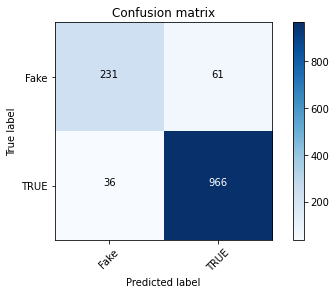

In [ ]:
from sklearn import linear_model as pd_linear_model
## best C and max_iter can be find by gridsearch, i,ve just use trial and error
linear_clf = pd_linear_model.PassiveAggressiveClassifier(C=5, max_iter=300)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['Fake', 'TRUE'])

In [ ]:
# Create the list of alphas: alphas
Cs = np.arange(1, 10, 1)
iterr = np.array([100,200,300,400,500])
# Define train_and_predict()
def train_and_predict(c,i):
    # Instantiate the classifier: nb_classifier
    nb_classifier = pd_linear_model.PassiveAggressiveClassifier(C=c, max_iter=i)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
#scores=[]
a=0
zero_data=np.zeros((len(Cs),len(iterr)))
temp = pd.DataFrame(zero_data, index = Cs , columns = iterr)
for c in Cs:
    b=0
    for i in iterr:
        #scores.append(train_and_predict(c, i))
        temp.iloc[a,b]=train_and_predict(c, i)
        b+=1
    a+=1
print('Score: ', temp.to_numpy().max())
for col in iterr:
    for row in Cs:
        if temp.loc[row,col]==temp.to_numpy().max():
            print('C : ', row, ' Max_iter : ', col)
print()

Score:  0.9296754250386399
C :  1  Max_iter :  200



In [ ]:
X_new=["covid is not like the flu"]
tfidf_Newtest=tfidf_vectorizer.transform(X_new)
pred2 = linear_clf.predict(tfidf_Newtest)
pred2

array(['TRUE'], dtype='<U4')

In [ ]:
X_new=[" Trump"] # :-)
tfidf_Newtest=tfidf_vectorizer.transform(X_new)
pred3 = linear_clf.predict(tfidf_Newtest)
pred3

array(['Fake'], dtype='<U4')

In [ ]:
linear_clf = pd_linear_model.PassiveAggressiveClassifier(C=1, max_iter=200)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       292
           1       0.94      0.96      0.95      1002

    accuracy                           0.92      1294
   macro avg       0.90      0.88      0.89      1294
weighted avg       0.92      0.92      0.92      1294



## SVC

In [ ]:
clf=LinearSVC()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       292
           1       0.94      0.97      0.96      1002

    accuracy                           0.93      1294
   macro avg       0.91      0.88      0.90      1294
weighted avg       0.93      0.93      0.93      1294



In [ ]:
y = pd.concat([df1.label,df2.label], ignore_index = True) 
X= pd.concat([df1.content,df2.content], ignore_index = True) 
count_vectorizer = CountVectorizer(stop_words='english')

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_clf, tfidf_train , y, cv=5)
scores

array([0.89540816, 0.88265306, 0.88392857, 0.94770408, 0.91187739])

accuracy:   0.860
Confusion matrix, without normalization
              precision    recall  f1-score   support

        Fake       0.87      0.45      0.59       292
        TRUE       0.86      0.98      0.92      1002

    accuracy                           0.86      1294
   macro avg       0.87      0.71      0.75      1294
weighted avg       0.86      0.86      0.84      1294



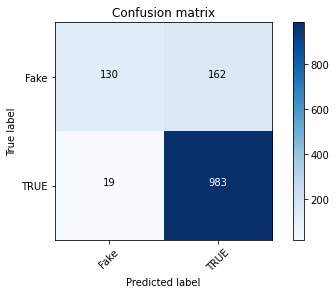

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(tfidf_train, y_train)
yhat = model.predict(tfidf_test)
score = metrics.accuracy_score(y_test, yhat)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, yhat, labels=['Fake', 'TRUE'])
plot_confusion_matrix(cm, classes=['Fake', 'TRUE'])
report = classification_report(y_test, yhat)
print(report)

## Cross validation score

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold# We transform each complaint into a vector

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X) 

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(alpha=0.1),
    LogisticRegression(random_state=0),
    pd_linear_model.PassiveAggressiveClassifier(C=1, max_iter=200),
]

for model in models:
    print(model)

    y_pred = cross_val_predict(model, tfidf_train, y, cv = 5)
    print(classification_report(y, y_pred, target_names=["FAKE","REAL"]))


RandomForestClassifier(max_depth=5, random_state=0)


/Users/mohsenbahremani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        FAKE       0.00      0.00      0.00       866
        REAL       0.78      1.00      0.88      3053

    accuracy                           0.78      3919
   macro avg       0.39      0.50      0.44      3919
weighted avg       0.61      0.78      0.68      3919

LinearSVC()
              precision    recall  f1-score   support

        FAKE       0.81      0.78      0.79       866
        REAL       0.94      0.95      0.94      3053

    accuracy                           0.91      3919
   macro avg       0.87      0.86      0.87      3919
weighted avg       0.91      0.91      0.91      3919

MultinomialNB(alpha=0.1)
              precision    recall  f1-score   support

        FAKE       0.78      0.72      0.75       866
        REAL       0.92      0.94      0.93      3053

    accuracy                           0.89      3919
   macro avg       0.85      0.83      0.84      3919
weighted avg       0.89      0.89    